## 章节 9.2：偏见评论分类（词嵌入，调参）
## Section 9.2: Embedding Sarcasm Detction with Tuning

In [1]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
vocab_size = 10000
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'
training_size = 18000
max_length = 150

with open('sarcasm.json','r',encoding='utf-8') as f:
    data = json.load(f)

training_data, training_label = [x['headline'] for x in data[:training_size]], [x['is_sarcastic'] for x in data[:training_size]]
testing_data, testing_label = [x['headline'] for x in data[training_size:]], [x['is_sarcastic'] for x in data[training_size:]]

In [39]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_data)

word_index = tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(training_data)
training_padded = pad_sequences(training_sequence, maxlen = max_length, padding = padding_type, truncating=trunc_type)
testing_sequence = tokenizer.texts_to_sequences(testing_data)
testing_padded = pad_sequences(testing_sequence, maxlen = max_length, padding = padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_label = np.array(training_label)
testing_padded = np.array(testing_padded)
testing_label = np.array(testing_label)

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(35, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(training_padded, training_label, epochs = 10, validation_data = (testing_padded,testing_label), verbose = 2)

Epoch 1/10
563/563 - 2s - loss: 0.6803 - accuracy: 0.5609 - val_loss: 0.6576 - val_accuracy: 0.6166
Epoch 2/10
563/563 - 2s - loss: 0.5239 - accuracy: 0.7661 - val_loss: 0.4234 - val_accuracy: 0.8281
Epoch 3/10
563/563 - 2s - loss: 0.3503 - accuracy: 0.8626 - val_loss: 0.3744 - val_accuracy: 0.8353
Epoch 4/10
563/563 - 1s - loss: 0.2868 - accuracy: 0.8863 - val_loss: 0.3470 - val_accuracy: 0.8554
Epoch 5/10
563/563 - 1s - loss: 0.2487 - accuracy: 0.9041 - val_loss: 0.3409 - val_accuracy: 0.8573
Epoch 6/10
563/563 - 1s - loss: 0.2202 - accuracy: 0.9152 - val_loss: 0.3397 - val_accuracy: 0.8575
Epoch 7/10
563/563 - 2s - loss: 0.1946 - accuracy: 0.9263 - val_loss: 0.3440 - val_accuracy: 0.8554
Epoch 8/10
563/563 - 1s - loss: 0.1770 - accuracy: 0.9334 - val_loss: 0.3579 - val_accuracy: 0.8538
Epoch 9/10
563/563 - 1s - loss: 0.1580 - accuracy: 0.9437 - val_loss: 0.3639 - val_accuracy: 0.8536
Epoch 10/10
563/563 - 2s - loss: 0.1417 - accuracy: 0.9499 - val_loss: 0.3770 - val_accuracy: 0.8542

<Figure size 432x288 with 0 Axes>

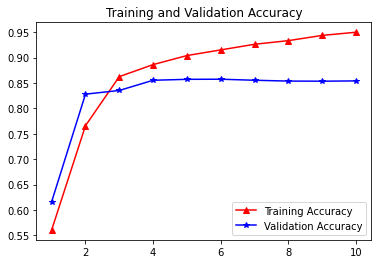

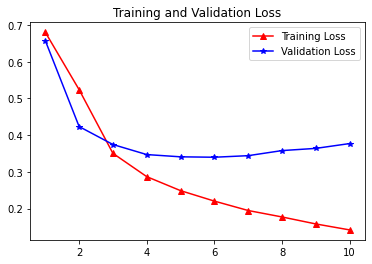

<Figure size 432x288 with 0 Axes>

In [43]:
loss,acc,val_loss,val_acc = history.history.values()
epochs = range(1,len(loss)+1)
import matplotlib.pyplot as plt
# Plot graph
plt.plot(epochs,acc,'r-^',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b-*', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'r-^',label='Training Loss')
plt.plot(epochs,val_loss,'b-*',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()